# GROUP - 8: Advanaced model submission.

- Ronald Wallace G (20BDA10)
- Rishabh Sarkar (20BDA26)
- Tanya Ranjan (20BDA32)
- Gunam Ramya Sri (20BDA33)
- Parvathy Charuroopa (20BDA38)
- Bharath Sakthivel(20BDA59)

## LSTM:

Long short-term memory (LSTM) is a type of artificial recurrent neural network (RNN) . Unlike standard feedforward neural networks, LSTMs have feedback connections. It can not only process single data points, but also entire sequences of data.
In other words, they have a memory capacity. This characteristic is extremely useful when we deal with Time-Series or Sequential Data. Unlike Traditional RNNs, LSTMs are capable of learning long-term dependencies i,e; Retaining information for a longer time and solving the vanishing gradient problem faced by most of the Recurrent Neural netwroks. Due to this property they are extensively used for speech recognition, language modeling, translation, image captioning and also Time Series forecasting.

## Working Of LSTM:

The main component LSTM relies on in something called the cell state. Cell state runs down the entire layer of the LSTM with some minor interactions. The LSTM has the ability to remove or add information to the cell state. carefully regulated by structures called gates.
Gates are the deciding factor when it comes to reatining selective information. They are composed of a sigmoid neural network that outputs a value between 0 and 1. where values close to zero indicate the information has to be discarded and values close to one impies values are necessary to make predictions.
The architecture of LSTM is as follows:

<center><img src= https://i.stack.imgur.com/RHNrZ.jpg alt="drawing" style="width:600px;"/></center>


## LSTM for time Series:

As stated earlier LSTM are capable of retaining the necessary information needed for predictions and for this this reason are used in NLP tasks to auto generate words based on the occurences of previous words in a sentence. Similar Principle can be applied in Time Series scenarios as well. The main goal is to predict the future values based on the Present/past values provided. LSTM can be a good alternative to traditional time Series models like ARIMA. Though mnay advanced models have emerged specially for time series LSTMs do perform well in majority of the cases.

## Pros of LSTM:
•	Typical recurrent neural networks can experience a loss in information, often referred to as the vanishing gradient problem. This is caused by the repeated use of the recurrent weight matrix in RNN. In an LSTM model, the recurrent weight matrix is replaced by an identify function in the carousel and controlled by a series of gates. The input gate, output gate and forget gate acts like a switch that controls the weights and creates the long-term memory function.

## Cons of LSTM:

• LSTMs became popular because they could solve the problem of vanishing gradients. But it turns out, they fail to remove it completely. The problem lies in the fact that the data still must move from cell to cell for its evaluation. Moreover, the cell has become quite complex now with the additional features (such as forget gates) being brought into the picture.

• They require a lot of resources and time to get trained and become ready for real-world applications.

• LSTMs are prone to overfitting and it is difficult to apply the dropout algorithm to curb this issue.

• In case of complex time series data(train1 , in our case) the LSTM does not capture variation well over time.



In [133]:
## importing the necessary libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore')

In [2]:
## loading our dataset

table=pd.read_csv(r'D:\BDA 2020 assignments\Econometrics\train_.csv')

In [3]:
## Type-casting the application_date column

table['application_date']=pd.to_datetime(table['application_date'],dayfirst=True)

In [4]:
table.head()

,application_date,segment,branch_id,state,zone,no_of_applicants
0,2017-04-01,1,1.0,WEST BENGAL,EAST,40
1,2017-04-01,1,3.0,DELHI,NORTH,58
2,2017-04-01,1,5.0,KARNATAKA,SOUTH,10
3,2017-04-01,1,7.0,WEST BENGAL,EAST,2
4,2017-04-01,1,8.0,WEST BENGAL,EAST,13


In [5]:
table.segment.unique()

array([1, 2], dtype=int64)

In [6]:
## Grouping the data based on two columns.

table=table.groupby(['application_date','segment'])['no_of_applicants'].sum().reset_index()

In [7]:
table.head()

,application_date,segment,no_of_applicants
0,2017-04-01,1,299
1,2017-04-01,2,897
2,2017-04-02,2,605
3,2017-04-03,1,42
4,2017-04-03,2,2016


In [8]:
table.segment.unique()

array([1, 2], dtype=int64)

In [9]:
table.isnull().sum()

application_date    0
segment             0
no_of_applicants    0
dtype: int64

In [10]:
table.head()

,application_date,segment,no_of_applicants
0,2017-04-01,1,299
1,2017-04-01,2,897
2,2017-04-02,2,605
3,2017-04-03,1,42
4,2017-04-03,2,2016


In [11]:
# Splitting the data into 2 based on the segments
train1 = table[table['segment'] == 1]
train1 = train1.groupby('application_date')['no_of_applicants'].sum().reset_index()
train2 = table[table['segment'] == 2]
train2 = train2.groupby('application_date')['no_of_applicants'].sum().reset_index()

In [12]:
train1.head()

,application_date,no_of_applicants
0,2017-04-01,299
1,2017-04-03,42
2,2017-04-04,23
3,2017-04-05,1530
4,2017-04-07,1341


In [13]:
## setting the application_date column to be the index
train1.set_index('application_date',inplace=True)

In [14]:
train1=train1.asfreq('D')

In [15]:
train1.head()

,no_of_applicants
application_date,
2017-04-01,299.0
2017-04-02,NaN
2017-04-03,42.0
2017-04-04,23.0
2017-04-05,1530.0


In [16]:
## filling the missing values using interpolation method.
train1['no_of_applicants']=train1['no_of_applicants'].interpolate()

In [17]:
train1.head()

,no_of_applicants
application_date,
2017-04-01,299.0
2017-04-02,170.5
2017-04-03,42.0
2017-04-04,23.0
2017-04-05,1530.0


In [18]:
train2.head()

,application_date,no_of_applicants
0,2017-04-01,897
1,2017-04-02,605
2,2017-04-03,2016
3,2017-04-04,2245
4,2017-04-05,2415


In [19]:
train2.set_index('application_date',inplace=True)

In [20]:
train2.interpolate(inplace=True)

In [21]:
train2.head()

,no_of_applicants
application_date,
2017-04-01,897
2017-04-02,605
2017-04-03,2016
2017-04-04,2245
2017-04-05,2415


### Visualising the variation of number of applicants over time for both segment 1 and 2

<AxesSubplot:xlabel='application_date'>

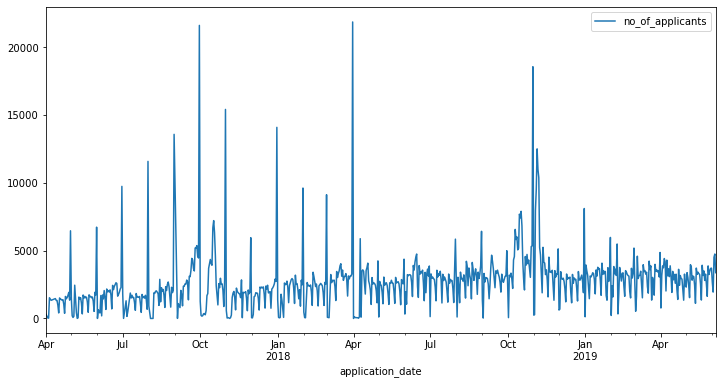

In [22]:
train1.plot(figsize=(12,6))

<AxesSubplot:xlabel='application_date'>

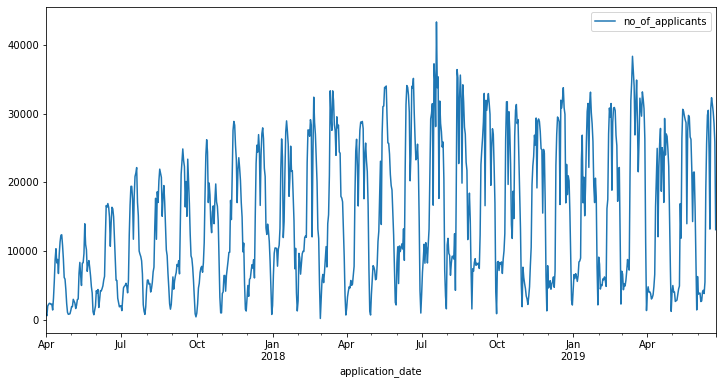

In [23]:
train2.plot(figsize=(12,6))

### The plots below show the trend and seasonality components seperately in both segement 1 and 2

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (16, 8)

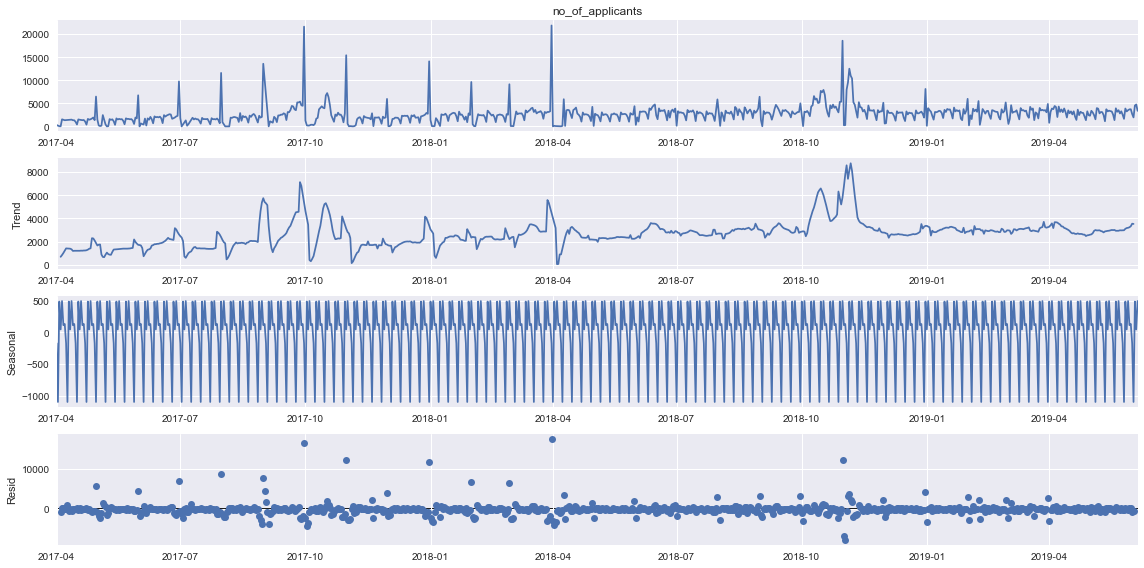

In [25]:
results=seasonal_decompose(train1['no_of_applicants'])
results.plot();

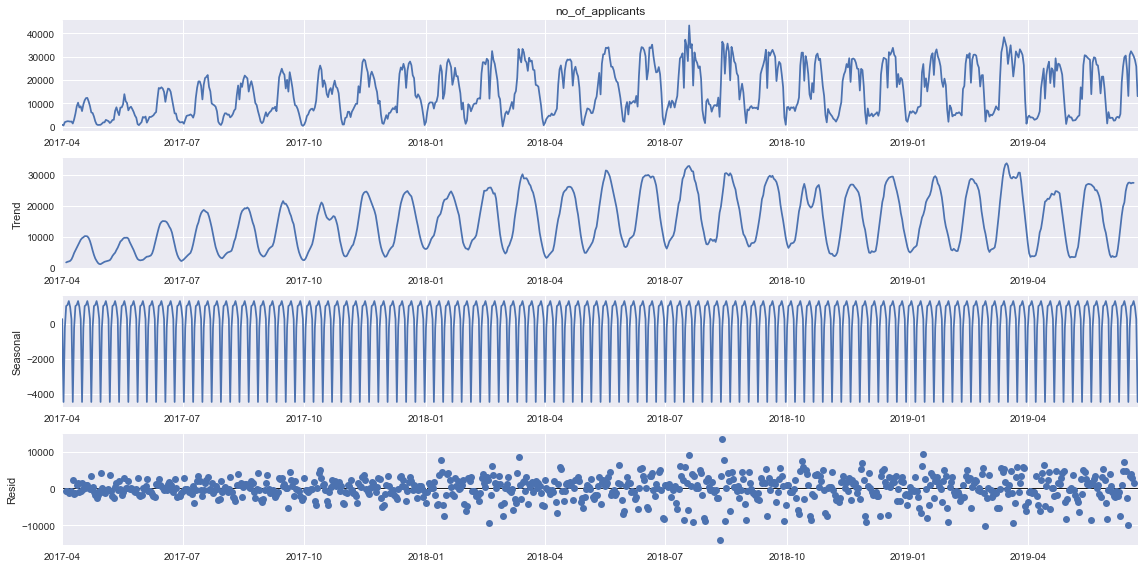

In [26]:
results=seasonal_decompose(train2['no_of_applicants'])
results.plot();

### Checking for any underlying stationarity in both the data

In [27]:
vals= train1['no_of_applicants'].values
result = adfuller(vals)
print('ADF Stat: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] < result[4]["5%"]:
    print ("Time Series is Stationary")
else:
    print ("Time Series is Non-Stationary")

ADF Stat: -4.591801
p-value: 0.000134
Critical Values:
	1%: -3.439
	5%: -2.865
	10%: -2.569
Time Series is Stationary


In [28]:
vals= train2['no_of_applicants'].values
result = adfuller(vals)
print('ADF Stat: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] < result[4]["5%"]:
    print ("Time Series is Stationary")
else:
    print ("Time Series is Non-Stationary")

ADF Stat: -4.229483
p-value: 0.000587
Critical Values:
	1%: -3.439
	5%: -2.865
	10%: -2.569
Time Series is Stationary


In [29]:
len(train1)

796

In [30]:
## applying log transformation on the segment 1 data

train1['no_of_applicants']=np.log(train1['no_of_applicants'])

In [31]:
train11=train1.iloc[:750]
test11=train1.iloc[750:]

In [32]:
train11.head(),train11.tail()

(                  no_of_applicants
 application_date                  
 2017-04-01                5.700444
 2017-04-02                5.138735
 2017-04-03                3.737670
 2017-04-04                3.135494
 2017-04-05                7.333023,
                   no_of_applicants
 application_date                  
 2019-04-16                7.957177
 2019-04-17                8.086718
 2019-04-18                7.864036
 2019-04-19                8.092851
 2019-04-20                7.661527)

### Since LSTMs require scaleed values, this is a crucial step that has to implemented

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [34]:
scaler.fit(train11)
scaled_train1=scaler.transform(train11)
scaled_test1=scaler.transform(test11)

In [35]:
scaled_train1[:10]

array([[0.57041189],
       [0.51420484],
       [0.37400794],
       [0.31375158],
       [0.73377509],
       [0.72739553],
       [0.72058138],
       [0.72245898],
       [0.724302  ],
       [0.72611169]])

In [36]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [37]:
n_input=3
n_feature = 1
generator=TimeseriesGenerator(scaled_train1,scaled_train1,length=n_input,batch_size=1)

In [38]:
X,y=generator[1]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n{y}')

Given the Array: 
[0.51420484 0.37400794 0.31375158]
Predict this y: 
[[0.73377509]]


In [39]:
n_input=45
n_features=1
generator1=TimeseriesGenerator(scaled_train1,scaled_train1,length=n_input,batch_size=2)

In [40]:
## importing necessary packages from the keras library required to build our model

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [41]:
model=Sequential()
model.add(LSTM(100,activation='relu',input_shape=(n_input,n_feature)))
model.add(Dense(1))
model.compile(optimizer='',loss='mse')

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.fit(generator1,epochs=50)

Epoch 1/50
353/353 [==============================] - 7s 16ms/step - loss: 0.0272
Epoch 2/50
353/353 [==============================] - 6s 16ms/step - loss: 0.0145
Epoch 3/50
353/353 [==============================] - 5s 15ms/step - loss: 0.0146
Epoch 4/50
353/353 [==============================] - 6s 16ms/step - loss: 0.0130
Epoch 5/50
353/353 [==============================] - 4s 11ms/step - loss: 0.0126
Epoch 6/50
353/353 [==============================] - 3s 9ms/step - loss: 0.0125
Epoch 7/50
353/353 [==============================] - 3s 9ms/step - loss: 0.0125
Epoch 8/50
353/353 [==============================] - 3s 9ms/step - loss: 0.0121
Epoch 9/50
353/353 [==============================] - 3s 9ms/step - loss: 0.0117
Epoch 10/50
353/353 [==============================] - 3s 9ms/step - loss: 0.0120
Epoch 11/50
353/353 [==============================] - 3s 9ms/step - loss: 0.0119
Epoch 12/50
353/353 [==============================] - 3s 9ms/step - loss: 0.0117
Epoch 13/50
353/353 

In [44]:
## The value that is to be predicted will take values of previous 45 days into account
last_train_batch = scaled_train1[-45:]

In [45]:
## Reshaping the features
last_train_batch = last_train_batch.reshape((1,n_input,n_features))

In [46]:
model.predict(last_train_batch)

array([[0.80406797]], dtype=float32)

In [47]:
scaled_test1[0]

array([0.72531775])

In [48]:
## make predictions and store it in a list which will be concatenated to the test set 
test1_predictions = []

first_eval_batch = scaled_train1[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test11)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test1_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [49]:
test1_predictions

[array([0.80406797], dtype=float32),
 array([0.8112477], dtype=float32),
 array([0.8115454], dtype=float32),
 array([0.812477], dtype=float32),
 array([0.81283], dtype=float32),
 array([0.81311774], dtype=float32),
 array([0.81329906], dtype=float32),
 array([0.81342816], dtype=float32),
 array([0.8135172], dtype=float32),
 array([0.81358004], dtype=float32),
 array([0.81362426], dtype=float32),
 array([0.8136555], dtype=float32),
 array([0.81367755], dtype=float32),
 array([0.81369317], dtype=float32),
 array([0.8137044], dtype=float32),
 array([0.81371236], dtype=float32),
 array([0.81371796], dtype=float32),
 array([0.81372213], dtype=float32),
 array([0.8137249], dtype=float32),
 array([0.8137269], dtype=float32),
 array([0.81372845], dtype=float32),
 array([0.8137295], dtype=float32),
 array([0.81373024], dtype=float32),
 array([0.81373084], dtype=float32),
 array([0.8137312], dtype=float32),
 array([0.81373143], dtype=float32),
 array([0.8137317], dtype=float32),
 array([0.813731

In [50]:
test11.head()

,no_of_applicants
application_date,
2019-04-21,7.248504
2019-04-22,8.196712
2019-04-23,7.801800
2019-04-24,8.061802
2019-04-25,7.989899


In [51]:
## converting the values to their original form 
true_predictions1 = scaler.inverse_transform(test1_predictions)
true_predictions1=np.exp(true_predictions1)

In [134]:
test11['Predictions'] = true_predictions1

In [135]:
test11['no_of_applicants']=np.exp(test11['no_of_applicants'])

In [54]:
test11.head()

,no_of_applicants,Predictions
application_date,,
2019-04-21,1406.0,3088.679345
2019-04-22,3629.0,3318.439735
2019-04-23,2445.0,3328.325921
2019-04-24,3171.0,3359.458010
2019-04-25,2951.0,3371.329467


<AxesSubplot:xlabel='application_date'>

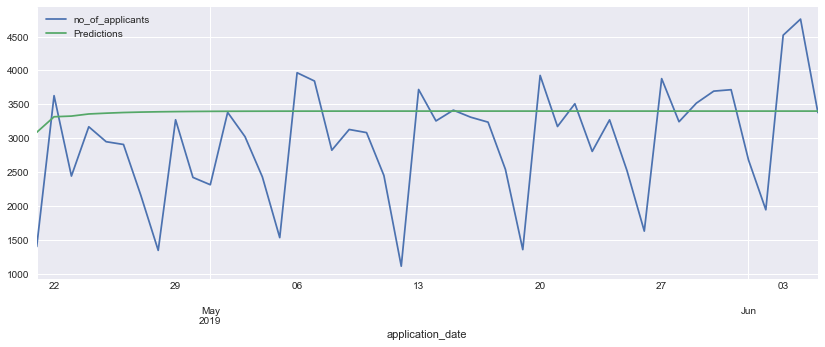

In [55]:
## Visualising our predictions
test11.plot(figsize=(14,5))

In [56]:
## Model Evaluation based on MAPE(mean absolute error Percentage) as our metric.
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt
mape=mean_absolute_percentage_error(test11['no_of_applicants'],test11['Predictions'])
print(mape)

0.34127604687705076


### All the steps implemented on segment 1 data is repeated for segement 2 and model is evaluated 

In [107]:
len(train2)

814

In [108]:
train22=train2.iloc[:780]
test22=train2.iloc[780:]

In [109]:
train2.head(),train2.tail()

(                  no_of_applicants
 application_date                  
 2017-04-01                     897
 2017-04-02                     605
 2017-04-03                    2016
 2017-04-04                    2245
 2017-04-05                    2415,
                   no_of_applicants
 application_date                  
 2019-06-19                   31360
 2019-06-20                   30255
 2019-06-21                   28593
 2019-06-22                   25863
 2019-06-23                   13126)

In [110]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [111]:
scaler.fit(train22)
scaled_train2=scaler.transform(train22)
scaled_test2=scaler.transform(test22)

In [112]:
scaled_train2[:10]

array([[0.01601985],
       [0.00925024],
       [0.04196226],
       [0.04727129],
       [0.0512125 ],
       [0.05037789],
       [0.04736403],
       [0.04847684],
       [0.0284926 ],
       [0.06862336]])

In [113]:
n_input=3
n_features=1
generator=TimeseriesGenerator(scaled_train2,scaled_train2,length=n_input,batch_size=5)

In [114]:
X,y=generator[1]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n{y}')

Given the Array: 
[0.05037789 0.04736403 0.04847684 0.04736403 0.04847684 0.0284926
 0.04847684 0.0284926  0.06862336 0.0284926  0.06862336 0.12618816
 0.06862336 0.12618816 0.19879909]
Predict this y: 
[[0.0284926 ]
 [0.06862336]
 [0.12618816]
 [0.19879909]
 [0.23519729]]


In [115]:
n_input=40
n_features=1
generator=TimeseriesGenerator(scaled_train2,scaled_train2,length=n_input,batch_size=1)

In [116]:
model=Sequential()
model.add(LSTM(100,activation='relu',input_shape=(n_input,n_feature)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [118]:
model.fit(generator,epochs=60)

Epoch 1/60
740/740 [==============================] - 6s 7ms/step - loss: 0.0236
Epoch 2/60
740/740 [==============================] - 5s 7ms/step - loss: 0.0150
Epoch 3/60
740/740 [==============================] - 5s 7ms/step - loss: 0.0133
Epoch 4/60
740/740 [==============================] - 5s 7ms/step - loss: 0.0125
Epoch 5/60
740/740 [==============================] - 5s 7ms/step - loss: 0.0118
Epoch 6/60
740/740 [==============================] - 5s 7ms/step - loss: 0.0110
Epoch 7/60
740/740 [==============================] - 5s 7ms/step - loss: 0.0103
Epoch 8/60
740/740 [==============================] - 5s 7ms/step - loss: 0.0097
Epoch 9/60
740/740 [==============================] - 5s 7ms/step - loss: 0.0093
Epoch 10/60
740/740 [==============================] - 5s 7ms/step - loss: 0.0093
Epoch 11/60
740/740 [==============================] - 5s 7ms/step - loss: 0.0091
Epoch 12/60
740/740 [==============================] - 5s 7ms/step - loss: 0.0090
Epoch 13/60
740/740 [====

In [119]:
last_train_batch2 = scaled_train2[-40:]

In [120]:
last_train_batch2= last_train_batch2.reshape((1,n_input,n_features))

In [121]:
model.predict(last_train_batch2)

array([[0.60240674]], dtype=float32)

In [122]:
scaled_test2[0]

array([0.68491213])

In [123]:
test2_predictions = []

first_eval_batch2 = scaled_train2[-n_input:]
current_batch = first_eval_batch2.reshape((1, n_input, n_features))

for i in range(len(test22)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test2_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [124]:
test2_predictions

[array([0.60240674], dtype=float32),
 array([0.57958496], dtype=float32),
 array([0.5497225], dtype=float32),
 array([0.5266328], dtype=float32),
 array([0.50490886], dtype=float32),
 array([0.47436544], dtype=float32),
 array([0.42514876], dtype=float32),
 array([0.36354113], dtype=float32),
 array([0.25884476], dtype=float32),
 array([0.12205975], dtype=float32),
 array([0.05043638], dtype=float32),
 array([0.05846392], dtype=float32),
 array([0.08609754], dtype=float32),
 array([0.09583952], dtype=float32),
 array([0.09817], dtype=float32),
 array([0.10380158], dtype=float32),
 array([0.11467573], dtype=float32),
 array([0.12977068], dtype=float32),
 array([0.15132979], dtype=float32),
 array([0.18722871], dtype=float32),
 array([0.27158687], dtype=float32),
 array([0.38329726], dtype=float32),
 array([0.49529222], dtype=float32),
 array([0.5485576], dtype=float32),
 array([0.5558959], dtype=float32),
 array([0.54946434], dtype=float32),
 array([0.5377073], dtype=float32),
 array([0

In [125]:
test22.head()

,no_of_applicants
application_date,
2019-05-21,29749
2019-05-22,29467
2019-05-23,26609
2019-05-24,26262
2019-05-25,21915


In [126]:
true_predictions2 = scaler.inverse_transform(test2_predictions)

In [136]:
test22['Predictions'] = true_predictions2

In [128]:
test22.head()

,no_of_applicants,Predictions
application_date,,
2019-05-21,29749,26190.212331
2019-05-22,29467,25205.817499
2019-05-23,26609,23917.730000
2019-05-24,26262,22921.778583
2019-05-25,21915,21984.738756


<AxesSubplot:xlabel='application_date'>

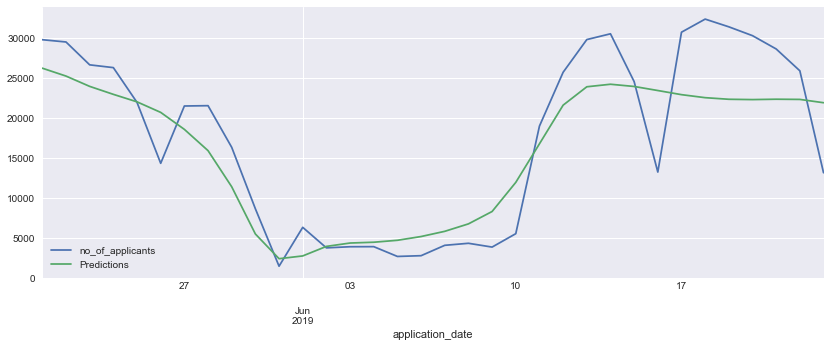

In [129]:
test22.plot(figsize=(14,5))

In [130]:
from sklearn.metrics import mean_absolute_percentage_error
mape=mean_absolute_percentage_error(test22['no_of_applicants'],test22['Predictions'])
print(mape)

0.35558066452174103


# Conclusion:

Since there are a lot of variations in our segment 1 data, our LSTM model does not capture it well inspite of log transformations. Although the data seems to be stationary there are extreme underlying seasonalities. whereas the model performs fairly well in case of segment 2 data with a mape of 0.355(35.5%) and predicts the variations well. The model performance could improve with more hyper parameter tuning and advance data preprocessing.